In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [ ]:
df = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
import seaborn as sns
import warnings
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

EDA (Exploratory Data Analysis)

Görsel veya nümerik yöntemlerle, veriyi bir özet üzerinden yorumlama yaklaşımıdır. Veriyi ön işleme noktasında atılması gereken adımlardan çıkarım yapmak için kullanılacak metod ve modele kadar pek çok konuda fikir sahibi olmamızı sağlar. Buradaki datasetimizde df.info() , df.describe() , df.head() fonksiyonlarini yazdirip data ile ilgili bilgileri ogrendik.  df.info(), veriye dair genel bir bilgi edinmemizi sağlar. Burada özelliklerin isimlerini, kaç satır ve sütünluk bir veri kümemiz olduğunu görebiliriz. 284807 satir, 31 sutundan olusan bir datasetimiz var.
   df.describe() ise, info ile aldığımız genel bilgiye dair başka bir özet sunar. Her bir değişkenden kaç adet olduğu veya bu değişkenlerin değerlerinin kaça ayrıldığı gibi. 
   df.head() komutu ile, varsayılan olarak ilk 5 satırdaki verileri görebiliyoruz. 

In [8]:
df.info()  
df.describe()
df.head() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


   df.info(), veriye dair genel bir bilgi edinmemizi sağlar. Burada özelliklerin isimlerini, kaç satır ve sütünluk bir veri kümemiz olduğunu görebiliriz. 284807 satir, 31 sutundan olusan bir datasetimiz var.
   df.describe() ise, info ile aldığımız genel bilgiye dair başka bir özet sunar. Her bir değişkenden kaç adet olduğu veya bu değişkenlerin değerlerinin kaça ayrıldığı gibi. 
   df.head() komutu ile, varsayılan olarak ilk 5 satırdaki verileri görebiliyoruz. 

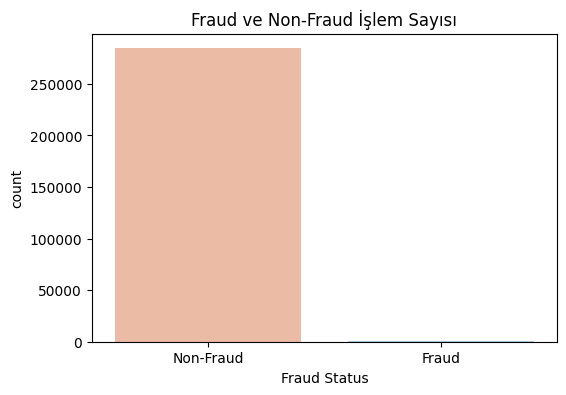

In [9]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
import seaborn as sns
import warnings
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


df.rename(columns={'Class': 'Fraud Status'}, inplace=True)


plt.figure(figsize=(6,4))   #Grafik boyutunu 6 birim genislik 4 birim yukseliklik olarak aldik.


sns.countplot(x='Fraud Status', data=df, palette='RdBu')   #Class sutununa gore dagilimi gorsellestirecegiz. Class 0 ise non-fraud, 1 ise fraud.


plt.xticks([0,1], ['Non-Fraud', 'Fraud'])   # X eksenine fraud ve non-fraud etiketlerini koyuyoruz.


plt.title("Fraud ve Non-Fraud İşlem Sayısı")   #Grafigimize baslik verdik.


plt.show()

Bu çalışmada, dolandırıcılık (fraud) ve dolandırıcılık olmayan (non-fraud) işlem sayıları arasındaki dağılımı görselleştirmek amacıyla bir countplot oluşturduk. Adımlar şu şekilde gerçekleştirildi:

Veri Hazırlığı: Veri setindeki Class sütunu, dolandırıcılık durumunu ifade ediyor ve sütun ismi Fraud Status olarak yeniden adlandırıldı. 0 değeri non-fraud işlemleri, 1 değeri ise fraud işlemleri temsil ediyor.

Görselleştirme: Seaborn kütüphanesinin countplot fonksiyonu ile Fraud Status sütununa göre veri dağılımını çizdik. X ekseninde Non-Fraud ve Fraud etiketleri gösterildi. Grafikte non-fraud işlemlerin sayısının oldukça fazla olduğunu, fraud işlemlerin sayısının ise oldukça düşük olduğunu görebiliyoruz.

Sonuç:
Non-Fraud işlemlerin sayısı yaklaşık 270.000 civarındayken, Fraud işlemlerin sayısı neredeyse yok denecek kadar az.
Bu dengesizlik, veri setinde dolandırıcılık işlemlerinin nadir olduğunu gösteriyor ve bu tür sınıflandırma problemlerinde dengesiz veri dağılımına dikkat edilmesi gerektiğini ortaya koyuyor.

In [10]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
import seaborn as sns
import warnings
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report



print(df['Fraud Status'].value_counts())   # 'Class' sütunundaki her bir sınıfın kaç tane olduğunu kontrol ediyoruz

print(df.isnull().sum())

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values='?', strategy='most_frequent')   #Eger bilinmeyen veriler varsa en cok olana atayacak kodu yazdirdik.

Fraud Status
0    284315
1       492
Name: count, dtype: int64
Time            0
V1              0
V2              0
V3              0
V4              0
V5              0
V6              0
V7              0
V8              0
V9              0
V10             0
V11             0
V12             0
V13             0
V14             0
V15             0
V16             0
V17             0
V18             0
V19             0
V20             0
V21             0
V22             0
V23             0
V24             0
V25             0
V26             0
V27             0
V28             0
Amount          0
Fraud Status    0
dtype: int64


Non-Fraud (0): 284,315 işlem
Fraud (1): 492 işlem
Bu sonuç, veri setindeki dolandırıcılık işlemlerinin çok nadir olduğunu ve veride ciddi bir sınıf dengesizliği (class imbalance) bulunduğunu göstermektedir.

In [11]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
import seaborn as sns
import warnings
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report



from sklearn.preprocessing import StandardScaler  # Verileri standardize etmek için kütüphaneyi içe aktarıyoruz
sc = StandardScaler()  # StandardScaler nesnesi oluşturuyoruz


df['Amount'] = sc.fit_transform(pd.DataFrame(df['Amount']))  


print(df['Amount'].head())  # İlk birkaç satırı görüntüleyecegiz.
print(df['Amount'].mean())  # Ortalama hesabi.
print(df['Amount'].std())   # Standart sapma hesabi.
#Ortalama yaklaşık olarak 0 ve standart sapma yaklaşık olarak 1 olmalıdır.

# Tüm sütunları görüntülemek için ayarı değiştiriyoruz  büyük veri çerçeveleriyle çalışırken tüm veriyi rahatça incelemenize yardımcı olabilir.
pd.options.display.max_columns = None

0    0.244964
1   -0.342475
2    1.160686
3    0.140534
4   -0.073403
Name: Amount, dtype: float64
2.913951958230651e-17
1.000001755579451


Standardizasyon işlemi, veri setindeki farklı ölçekteki değerlerin daha anlamlı hale getirilmesi ve makine öğrenimi modellerinin daha iyi performans göstermesini sağlar. Bu işlem sonrası, Amount sütununun ilk birkaç satırı ve temel istatistiksel özellikleri, yani ortalama ve standart sapma, incelenmiştir. Ortalama sıfıra ve standart sapma bire yaklaştığı için standardizasyon işleminin başarılı olduğu doğrulanmıştır. Ayrıca, veri setindeki tüm sütunları görüntüleyebilmek için, pandas ayarları değiştirilerek sütunların tamamı görünür hale getirilmiştir. Bu, özellikle büyük veri setleriyle çalışırken tüm veriyi rahatça analiz etmek açısından önemlidir.
Amount sütununa yapılan standardizasyon işleminin ardından elde edilen çıktı şu şekildedir:

Veri Örnekleri: İlk beş değere baktığımızda verilerin farklı sayısal değerler aldığını görüyoruz:

0.244964, -0.342475, 1.160686, 0.140534 , -0.073403
Bu değerler, Amount sütununun her bir gözlemi için, ortalamadan sapma miktarını göstermektedir. Negatif değerler, ortalamanın altında kalan verileri, pozitif değerler ise ortalamanın üzerinde kalan verileri temsil eder.

Ortalama: Çıktıda görüldüğü üzere, ortalama değeri 2.91 x 10⁻¹⁷ (yaklaşık sıfır) olarak hesaplanmıştır. Bu, standardizasyon işleminin doğru yapıldığını ve verilerin ortalamasının sıfır etrafında olduğunu doğrular.

Standart Sapma: Standart sapma değeri 1.000001755579451 olarak hesaplanmıştır, bu da yaklaşık olarak 1'e eşittir. Standart sapmanın 1 olması, verilerin yayılımının standardize edildiğini ve ölçekleme işleminin başarıyla gerçekleştiğini gösterir.

Bu sonuçlar, standardizasyonun hedeflerine ulaştığını ve verilerin ortalaması sıfır, standart sapması bire çok yakın olacak şekilde ölçeklendiğini göstermektedir.

In [12]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
import seaborn as sns
import warnings
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

df = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
df.rename(columns={'Class': 'Fraud Status'}, inplace=True)

from sklearn.impute import SimpleImputer  
imputer = SimpleImputer(missing_values='?', strategy='most_frequent')

# Bağımlı ve bağımsız değişkenleri belirliyoruz
X = df.drop(columns=['Fraud Status'])  # Bağımsız değişkenler
y = df['Fraud Status']  # Hedef değişken


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   # Eğitim ve test setlerine bölme (%80 eğitim, %20 test)

# Verileri standardize ediyoruz
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Eğitim verisine fit ve transform işlemi
X_test = scaler.transform(X_test)        # Test verisine sadece transform işlemi

Bu hücrede, kredi kartı dolandırıcılığı veri seti üzerinde veri ön işleme adımlarını gerçekleştirdik. İlk olarak, eksik verileri doldurmak için SimpleImputer sınıfını kullandık ve '?' ile temsil edilen eksik değerleri en sık görülen değerlerle doldurduk. Ardından, bağımsız değişkenler (özellikler) ve bağımlı değişken (hedef) olmak üzere veri setini ayırdık. Bağımsız değişkenler için "Fraud Status" sütunu çıkarıldı, bağımlı değişken olarak ise "Fraud Status" seçildi. Veriyi modellemeye hazırlamak için, train_test_split kullanarak veriyi eğitim (%80) ve test (%20) setlerine böldük. Son olarak, veri setini model için uygun hale getirmek amacıyla StandardScaler ile özellikleri standardize ettik. Eğitim verisi üzerinde hem fit hem transform işlemi uygulandı, test verisine ise yalnızca transform işlemi gerçekleştirildi.
Transform işlemi, makine öğrenmesi projelerinde veri setini uygun bir formata dönüştürmek için kullanılan bir süreçtir. Özellikle veri ölçeklendirme gibi ön işleme adımlarında yaygındır. Örneğin, StandardScaler kullanarak verileri dönüştürmek, verilerin her bir özelliğinin ortalamasını 0, standart sapmasını 1 olacak şekilde yeniden ölçeklendirir

LOGISTIC REGRESSION MODEL VS SUPPORT VECTOR MACHINES

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
import seaborn as sns
import warnings
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()   # Logistic Regression modelini oluşturma
log_reg.fit(X_train, y_train)    # Logistic Regression modelini egitme


from sklearn.svm import SVC
svm_model = SVC(kernel='rbf')  # RBF kernel kullanarak SVM oluşturma
svm_model.fit(X_train, y_train)   #SVM modelini egitiyoruz.


log_reg_pred = log_reg.predict(X_test)  # Logistic Regression tahminleri
svm_pred = svm_model.predict(X_test)    # SVM tahminleri

# Performans değerlendirme: Accuracy, Precision, Recall, F1-score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
# Veriyi ölçeklendirme için MinMaxScaler'ı deniyoruz (alternatif olarak StandardScaler da kullanılabilir)
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
df.rename(columns={'Class': 'Fraud Status'}, inplace=True)

# Bağımlı ve bağımsız değişkenleri belirliyoruz
X = df.drop(columns=['Fraud Status'])
y = df['Fraud Status']

# Veriyi eğitim ve test setlerine bölüyoruz
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verileri ölçeklendirme
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression modeli ve parametre aralığı
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Logistic Regression modelini oluşturuyoruz (max_iter artırıldı ve class_weight eklendi)
log_reg = LogisticRegression(solver='saga', max_iter=500, class_weight='balanced')

# GridSearchCV oluşturuyoruz: Model, denenecek parametreler ve 5 katlı çapraz doğrulama (cv=5)
grid_log_reg = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')

# Modeli eğitiyoruz (fit işlemi)
grid_log_reg.fit(X_train_scaled, y_train)

# En iyi parametreleri ve en yüksek skoru yazdırıyoruz
print("Tuned Logistic Regression Parameters: {}".format(grid_log_reg.best_params_))
print("Best score is {}".format(grid_log_reg.best_score_))

# En iyi modeli test seti üzerinde değerlendiriyoruz
y_pred = grid_log_reg.best_estimator_.predict(X_test_scaled)



/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

In [ ]:
#SVM hiperparametre ve crossvalidation birlestirerek kiyaslayacagim.

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# SVM modeli için GridSearchCV parametreleri (C, gamma ve kernel parametreleri denenecek)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']  # RBF ve linear kernel deniyoruz
}
df.rename(columns={'Class': 'Fraud Status'}, inplace=True)

# Bağımlı ve bağımsız değişkenleri belirliyoruz
X = df.drop(columns=['Fraud Status'])
y = df['Fraud Status']

# Veriyi eğitim ve test setlerine bölüyoruz
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verileri ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC()   # SVM modelini oluşturuyoruz


grid_svm = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')   # GridSearchCV oluşturuyoruz: Model, denenecek parametreler ve 5 katlı çapraz doğrulama (cv=5)


grid_svm.fit(X_train, y_train)   # Modeli eğitiyoruz (fit işlemi)

# En iyi parametreleri ve en yüksek skoru yazdırıyoruz
print("Tuned SVM Parameters: {}".format(grid_svm.best_params_))
print("Best score is {}".format(grid_svm.best_score_))

In [6]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
import seaborn as sns
import warnings
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Veri kümesini yüklüyoruz
df = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
df.rename(columns={'Class': 'Fraud Status'}, inplace=True)

# Bağımlı ve bağımsız değişkenleri belirliyoruz
X = df.drop(columns=['Fraud Status'])
y = df['Fraud Status']

# Veriyi eğitim ve test setlerine bölüyoruz
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verileri ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression Modeli
log_reg = LogisticRegression(max_iter=1000)  # İterasyon sayısını artırdık
log_reg.fit(X_train_scaled, y_train)
log_reg_pred = log_reg.predict(X_test_scaled)

# SVM Modeli
svm = SVC()
svm.fit(X_train_scaled, y_train)
svm_pred = svm.predict(X_test_scaled)

# Performans Metrikleri
print("Logistic Regression Performansı:")
print(f"Accuracy: {accuracy_score(y_test, log_reg_pred):.4f}")
print(f"Precision: {precision_score(y_test, log_reg_pred):.4f}")
print(f"Recall: {recall_score(y_test, log_reg_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, log_reg_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, log_reg_pred))

print("SVM Performansı:")
print(f"Accuracy: {accuracy_score(y_test, svm_pred):.4f}")
print(f"Precision: {precision_score(y_test, svm_pred):.4f}")
print(f"Recall: {recall_score(y_test, svm_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, svm_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, svm_pred))


Logistic Regression Performansı:
Accuracy: 0.9991
Precision: 0.8636
Recall: 0.5816
F1 Score: 0.6951

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962

SVM Performansı:
Accuracy: 0.9993
Precision: 0.9683
Recall: 0.6224
F1 Score: 0.7578

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.62      0.76        98

    accuracy                           1.00     56962
   macro avg       0.98      0.81      0.88     56962
weighted avg       1.00      1.00      1.00     56962



 Doğruluk (Accuracy):
Logistic Regression: 0.9991
SVM: 0.9993
Her iki model de çok yüksek doğruluk oranlarına sahip, ancak bu, veri setinde dengesiz sınıflar olduğu için yanıltıcı olabilir. Çünkü çoğunluk sınıfını (0) doğru tahmin etmek genel doğruluğu yüksek gösterir.
2. Kesinlik (Precision):
Logistic Regression: 0.8636
SVM: 0.9683
SVM, daha yüksek kesinlik ile daha az yanlış pozitif üretirken, Logistic Regression’a göre daha güvenilir sonuçlar veriyor. Kesinlik özellikle yanlış pozitiflerden kaçınmak istenen senaryolarda önemli.
3. Duyarlılık (Recall):
Logistic Regression: 0.5816
SVM: 0.6224
SVM, küçük bir farkla da olsa, sınıf 1’i daha iyi yakalıyor (yanlış negatifleri azaltıyor).
4. F1 Skoru:
Logistic Regression: 0.6951
SVM: 0.7578
F1 skoru, kesinlik ve duyarlılığın dengeli bir ölçüsü olduğundan, SVM daha iyi genel performans gösteriyor.
Sonuç:
SVM, özellikle azınlık sınıfı (1) üzerinde daha dengeli bir performans sunuyor ve yanlış pozitif/negatif dengesini daha iyi kuruyor. Logistic Regression ise hız açısından avantajlı olabilir ancak performans açısından SVM daha öne çıkıyor.


UNSUPERVISED LEARNING:

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


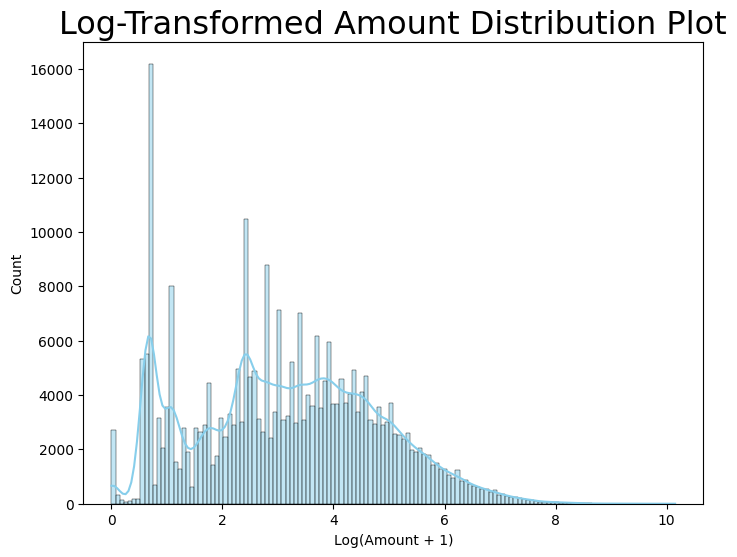

In [4]:
import seaborn as sns   
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
# Logaritmik dönüşüm uyguluyoruz. Bu sayede verilerimizi daha net gorebilecegiz.
df['LogAmount'] = np.log1p(df['Amount'])  # log1p, log(1+x) hesaplar ve sıfıra yakın değerler için daha güvenlidir

# Logaritmik dönüşüm sonrası dağılımı görselleştiriyoruz
plt.figure(figsize=(8, 6))
plt.title('Log-Transformed Amount Distribution Plot', fontsize=23)
sns.histplot(df['LogAmount'], color='skyblue', kde=True)  # 'LogAmount' için dağılım grafiği
plt.xlabel('Log(Amount + 1)')
plt.show()

Bu grafikte, Amount sütunundaki veriler üzerinde logaritmik bir dönüşüm uygulanmıştır. Bu dönüşüm, verilerin daha düzgün bir şekilde görselleştirilmesini sağlar ve özellikle çok geniş bir dağılıma sahip verilerde anormal büyüklükteki değerlerin etkisini azaltır.

Grafikte, düşük miktarlarda yığılma olduğu göze çarpmaktadır. X ekseninin sol tarafında, yani düşük Log(Amount + 1) değerlerinde, belirgin bir yoğunluk bulunmaktadır. Bu da işlem miktarlarının büyük çoğunluğunun nispeten küçük miktarlarda olduğunu gösterir.

Grafiğin sağ tarafında ise LogAmount değeri arttıkça, işlem sayısının azaldığını gözlemleyebiliriz. Yani daha büyük miktarlarda yapılan işlemler oldukça seyrek. Bu tür bir dağılım, finansal işlemlerde sıklıkla görülen bir durumdur; çoğu işlem küçük miktarlarda gerçekleşirken, büyük miktarlarda olanlar daha nadirdir.

Sonuç olarak, bu grafikte logaritmik dönüşüm kullanarak küçük ve büyük işlemler arasındaki farkı daha iyi görselleştirmiş olduk. Bu, makine öğrenimi modellemeleri için veri dengesizliğini azaltarak modelin daha dengeli öğrenmesini sağlayabilir.

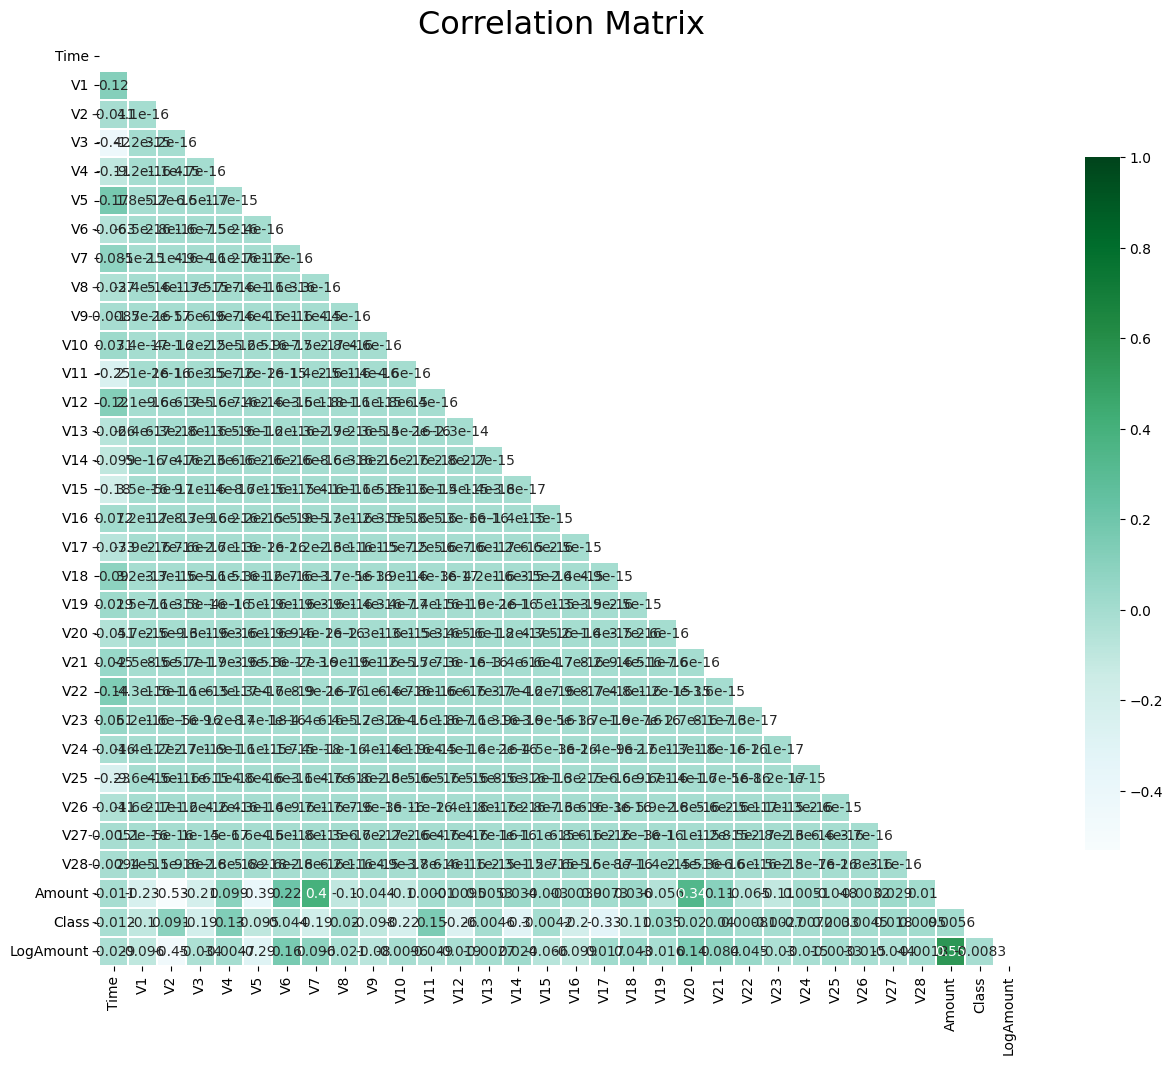

In [5]:
import seaborn as sns   
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
plt.figure(figsize=(16, 12))
plt.title('Correlation Matrix', fontsize=23)
mask = np.zeros_like(df.corr(), dtype=bool)  # 'np.bool' yerine 'bool' kullanıyoruz
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), linewidths=0.25, vmax=1.0, square=True, cmap="BuGn", 
            linecolor='w', annot=True, mask=mask, cbar_kws={"shrink": .75})
plt.show()



Korelasyon Değerleri:

Korelasyon katsayısı +1 ile -1 arasında değişir.
+1: Pozitif güçlü ilişki.
-1: Negatif güçlü ilişki.
0: Hiçbir ilişki yok.
Grafikte genel olarak yeşil tonlarında renkler var. Bu da değişkenler arasında bazı zayıf ya da orta düzeydeki korelasyonları gösteriyor.
Bağımlı Değişken (Class) ile Korelasyon:

Hedef değişkenimiz olan Fraud Status (Class) sütunu ile diğer değişkenler arasındaki korelasyonlar genelde düşük. Bu, dolandırıcılığı tespit ederken doğrudan belirli bir değişkenin büyük bir etkisinin olmadığını, ancak birden fazla değişkenin birleşik etkisinin daha önemli olabileceğini gösterir.
LogAmount değişkeni ile Fraud Status arasında neredeyse sıfıra yakın korelasyon var, bu da işlemin miktarının dolandırıcılık olup olmadığını belirlemede tek başına çok fazla anlam taşımadığını gösterir.
V Değişkenleri ile Korelasyon:

V değişkenleri, veride yapılan bir PCA (Principal Component Analysis) işleminden kaynaklanıyor olabilir. Bu yüzden çoğu birbirinden bağımsız veya zayıf ilişkiler gösteriyor.
Özellikle V1-V28 arasında güçlü korelasyonlar mevcut değil. Ancak, örneğin V2 ile V5 arasında orta düzeyde pozitif bir korelasyon görülüyor.
LogAmount ve Amount:

Orijinal miktar sütunu olan Amount ile logaritmik olarak dönüştürülmüş LogAmount arasında beklenildiği gibi pozitif bir korelasyon var (yaklaşık 0.55). Bu, logaritmik dönüşümün orijinal değerlerle ilişkili olduğunu ve verilerin daha iyi normalize edildiğini gösteriyor.
Sonuç: Bu korelasyon matrisi bize, tek bir değişkenin dolandırıcılık tahmininde güçlü bir belirleyici olmadığını, ancak değişkenlerin kombine olarak değerlendirilmesi gerektiğini gösteriyor. Dolayısıyla, sınıflandırma algoritmaları bu tür karmaşık ve zayıf ilişkiler üzerinden daha iyi sonuç verebilir.

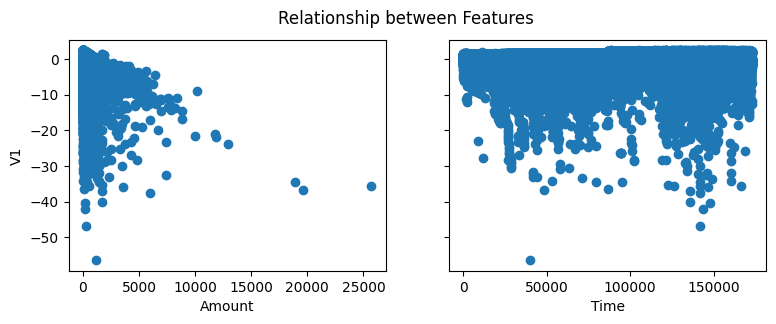

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(9, 3), sharey=True)

# 'Amount' ve 'V1' ilişkisi
axs[0].scatter(df["Amount"].values, df["V1"].values)
axs[0].set_xlabel('Amount')
axs[0].set_ylabel('V1')

# 'Time' ve 'V1' ilişkisi
axs[1].scatter(df["Time"].values, df["V1"].values)
axs[1].set_xlabel('Time')

plt.suptitle('Relationship between Features')
plt.show()


Birinci Grafik,Amount ile V1 arasındaki ilişkiyi gösteriyor. Amount x-ekseninde, V1 ise y-ekseninde yer alıyor. Bu grafikte, daha düşük Amount değerlerinde V1 değişkeninin daha geniş bir dağılım gösterdiği, ancak yüksek Amount değerlerinde bu dağılımın azaldığı gözlemlenebilir.


Ikinci grafik, Time ile V1 arasındaki ilişkiyi gösteriyor. Time x-ekseninde, V1 y-ekseninde yer alıyor. Bu grafikte, Time değişkeni arttıkça V1'in geniş bir dağılıma sahip olduğu görülüyor, ancak zamanın büyük kısmında yığılma daha yoğun bir şekilde üst bölgelerde gerçekleşmiş.
Genel Yorum:

Her iki grafikten de V1'in belirgin bir dağılım eğilimi olduğu anlaşılıyor, özellikle düşük Amount ve geniş Time aralığında. V1'in dolandırıcılık tespiti projelerinde önemli bir değişken olduğu göz önüne alındığında, bu ilişkiler sınıflandırma modelinin performansını etkileyebilir.


1. Veri Dağılımının Model Performansına Etkisi:
V1 ile Amount: İlk grafikte, küçük Amount (tutar) değerlerinde V1'in geniş bir dağılıma sahip olduğu, ancak büyük Amount değerlerinde bu dağılımın azaldığı görülüyor. Bu, küçük tutarlı işlemler için V1'in model için daha fazla bilgi sağladığını, büyük tutarlı işlemler için ise sınırlı bilgi sunduğunu gösteriyor olabilir. Eğer dolandırıcılık küçük tutarlı işlemler arasında daha sık meydana geliyorsa, model bu dağılımdan faydalanabilir.

V1 ile Time: İkinci grafikte, Time değişkenine göre V1 geniş bir dağılıma sahip, ancak bu dağılımın yoğunluğu belirli bir bölgede artmış. Bu durum, zamanla değişen bir davranış kalıbının varlığını gösterebilir. Eğer belirli zaman aralıklarında dolandırıcılık riski artıyorsa, Time ve V1'in bu ilişkisi modelin dolandırıcılığı daha iyi tespit etmesine yardımcı olabilir.

2. Modelin Öğrenme Kapasitesi:
Model, V1'in bu diğer özelliklerle olan ilişkisini iyi öğrenirse, dolandırıcılık tespiti gibi sınıflandırma görevlerinde doğruluğu artar. Ancak, eğer özellikler arasında lineer olmayan ilişkiler veya dengesiz dağılımlar varsa, model bu ilişkileri öğrenmekte zorlanabilir. Örneğin, Amount ile V1 arasındaki ilişki belirli bölgelerde daha güçlü olabilir, bu durumda model küçük Amount değerlerinde daha başarılı, büyük Amount değerlerinde ise daha başarısız olabilir.
3. Sınıflandırmada Önemli Özellikler:
V1, Amount, ve Time gibi özellikler arasında güçlü korelasyonlar varsa, bu özellikler dolandırıcılığı sınıflandırmada kritik bir rol oynayabilir. Bu ilişkileri doğru bir şekilde modellemek, sahte işlemleri gerçek olanlardan ayırma becerisini güçlendirir.

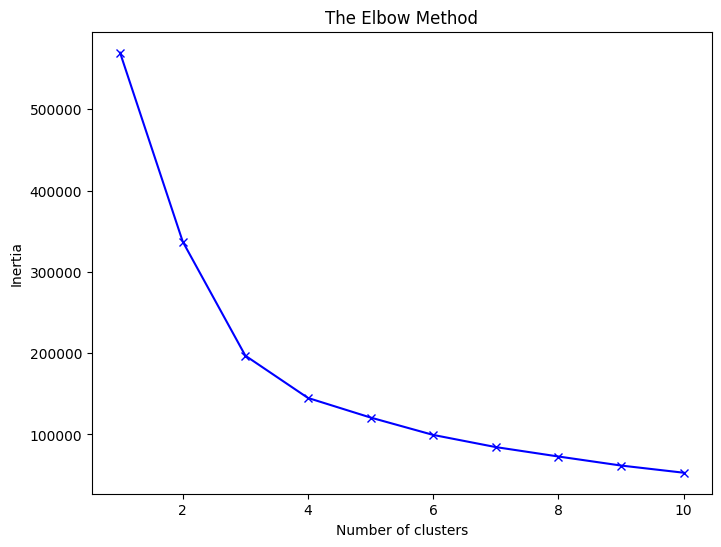

In [7]:
# 4. k-Means Kümeleme - Dirsek Yöntemi ile küme sayısını belirleme
# Veriyi standardize ediyoruz
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Amount', 'Time']])  


inertias = []  # Küme içi hata kareleri toplamını tutuyoruz (inertia)
for i in range(1, 11):  # 1'den 10'a kadar farklı küme sayısı deniyoruz
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=12, random_state=42)
    kmeans.fit(scaled_data)
    inertias.append(kmeans.inertia_)

# Küme sayısına göre dirsek grafiğini çiziyoruz
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertias, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

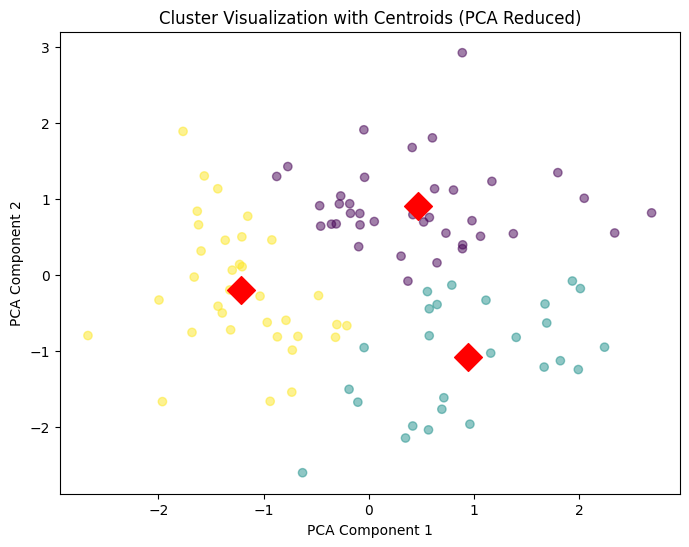

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


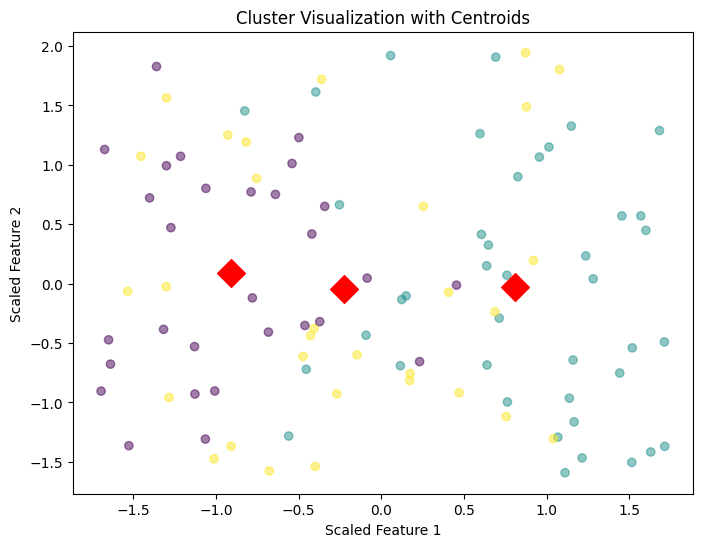

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Örnek veri seti (scaled_data yerine kullanmak için)
data = np.random.rand(100, 5)  # 100 veri noktası, 5 özellik

# 1. Veri ölçeklendirme (veri setini standartlaştırıyoruz)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# 2. PCA ile boyut indirgeme (5 boyuttan 2 boyuta indiriyoruz)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# 3. K-means kümeleme (2 boyutlu PCA verisi üzerinde 3 küme oluşturuyoruz)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(pca_data)

# 4. Küme merkezlerini ve etiketleri bulma
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# 5. PCA ile indirgenmiş verilerin kümeleme sonuçlarını scatter plot ile görselleştirme
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, alpha=0.5)  # Kümelenmiş noktalar
plt.scatter(centroids[:, 0], centroids[:, 1], marker='D', s=200, color='red')  # Küme merkezleri
plt.title('Cluster Visualization with Centroids (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# 6. PCA olmadan ölçeklenmiş veri ile K-means kümeleme
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)

# 7. Küme etiketleri ve merkezlerini bulma
labels = kmeans.predict(scaled_data)
centroids = kmeans.cluster_centers_

# 8. Ölçeklenmiş veriler üzerindeki kümeleme sonuçlarını scatter plot ile görselleştirme
plt.figure(figsize=(8, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels, alpha=0.5)  # Kümelenmiş noktalar
plt.scatter(centroids[:, 0], centroids[:, 1], marker='D', s=200, color='red')  # Küme merkezleri
plt.title('Cluster Visualization with Centroids')
plt.xlabel('Scaled Feature 1')
plt.ylabel('Scaled Feature 2')
plt.show()

İlk grafikte PCA (Principal Component Analysis) ile boyut indirgeme işlemi yapılmış ve bu indirgenen iki boyut üzerinden k-means kümeleme algoritması uygulanmıştır. Bu sayede, çok boyutlu veri seti daha anlaşılır bir hale getirilerek görselleştirilmiştir. Bu, veriler arasında daha net ayrımlar yapmayı kolaylaştırır ve verilerin genel yapısı hakkında bilgi verir.

İkinci grafikte ise boyut indirgeme adımı atlanmış, veriler doğrudan ölçeklendirilmiş haliyle k-means algoritması ile kümelenmiştir. Burada, veri özellikleri olduğu gibi kullanılmış ve verilerin k-means kümeleme sonuçları görselleştirilmiştir. Bu yaklaşım, veri özelliklerini tam olarak koruduğu için PCA kullanımıyla karşılaştırıldığında veri kaybı olmadan kümelenme yapılmasını sağlar. Ancak, görselleştirme açısından karmaşıklık artabilir.

Her iki grafikte de kırmızı elmaslar küme merkezlerini, farklı renkler ise verilerin hangi kümeye ait olduğunu göstermektedir.



/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


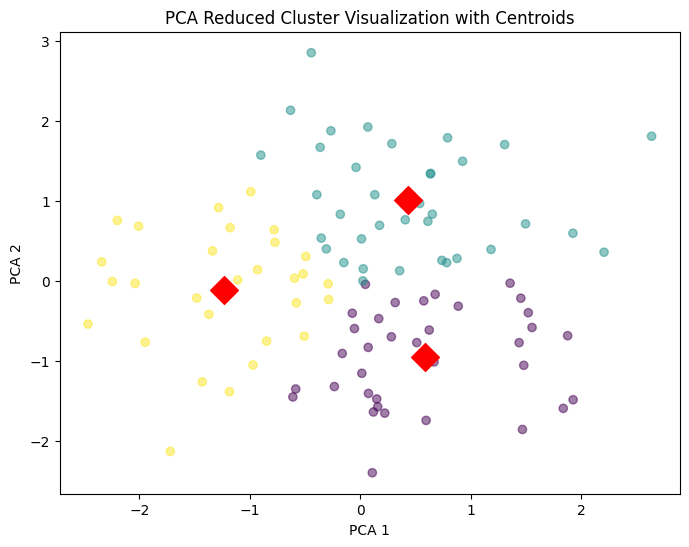

In [9]:
# Gerekli kütüphaneleri yükleyelim
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Örnek bir veri seti oluşturuyoruz, kendi veri setinizi kullanabilirsiniz
# 100 örnekten oluşan, 5 özellikli rastgele bir veri seti
data = np.random.rand(100, 5)

# Adım 1: Verileri ölçeklendirme
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)  # Veriyi standart ölçeklendirme (ortalama 0, std 1 olacak şekilde)

# Adım 2: PCA ile veriyi 2 boyuta indiriyoruz
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Adım 3: İndirgenmiş veri ile k-Means kümelemesi yapıyoruz
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca.fit(pca_data)

# Adım 4: PCA sonrası kümeleme sonuçlarını görselleştirme
labels_pca = kmeans_pca.predict(pca_data)

# Adım 5: Veriyi ve küme merkezlerini görselleştirme
plt.figure(figsize=(8, 6))

# Verileri scatter plot ile görselleştiriyoruz
# alpha=0.5 ifadesi, noktaların yarı saydam görünmesini sağlar
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels_pca, alpha=0.5)

# Küme merkezlerini kırmızı elmaslarla gösteriyoruz
plt.scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1], marker='D', s=200, color='red')

# Grafik başlığı ve eksen etiketleri
plt.title('PCA Reduced Cluster Visualization with Centroids')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

# Grafiği gösteriyoruz
plt.show()


Bu grafikte, PCA (Principal Component Analysis) kullanılarak veriler 2 boyuta indirgenmiş ve ardından k-Means algoritmasıyla kümeleme yapılmıştır. Kırmızı elmaslar, her bir kümenin merkezini temsil etmektedir. Noktalar ise verilerin bu iki boyutta görselleştirilen pozisyonlarını göstermektedir. Bu görselleştirme, veriler arasındaki ilişkileri daha kolay anlayabilmemizi sağlar.

Grafik Anlatımı:
PCA 1 ve PCA 2: Ana bileşenlerdir. Bu bileşenler, orijinal yüksek boyutlu verinin içindeki varyansı yakalayan iki yönü temsil eder. Veriler bu iki bileşen ekseninde gösterilmektedir.
Küme merkezleri: Kırmızı elmaslarla gösterilen merkezler, k-Means algoritmasıyla belirlenen her kümenin merkezi noktalarıdır.
Renklerle ayrılan kümeler: Farklı renkler her bir kümedeki verileri temsil eder (sarı, mor ve mavi).
Diğer Grafiklerden Farkı:
Bu grafik, PCA kullanılarak indirgenmiş verilerle yapılmış bir kümeleme görselleştirmesidir. Verilerin boyutunu ikiye indirerek, yüksek boyutlu veriyi daha anlaşılır bir hale getirir.
İlk grafikte: Veriler doğrudan orijinal boyutlardaki ölçeklendirilmiş özellikler ile görselleştirildi.
İkinci grafikte: Veriler yine orijinal boyutlarda ama farklı özellik kombinasyonlarıyla görselleştirildi.
Bu grafikte ise PCA kullanıldığı için, verilerin temel bileşenleri üzerinden kümeleme gösterimi yapılmıştır. PCA veriyi daha basitleştirip, kümeleme algoritmasının performansını artırabilir veya daha net kümeler gözlemleyebiliriz.
Üç Ayrı Grafiğin Amacı:
Ölçeklendirilmiş Özelliklerle Kümeleme: Bu, verilerin ölçeklendirilmiş haliyle nasıl kümelendiğini görmemizi sağlar.
Farklı Özelliklerle Kümeleme: Verilerin farklı özellikler arasında nasıl kümelendiğini ve merkezlerinin nasıl yerleştiğini görmek.
PCA ile Kümeleme: Veriyi iki boyuta indirerek, veriler arasındaki daha genel ilişkileri gözlemlememizi sağlar. PCA kullanarak daha görselleştirilebilir ve basitleştirilmiş bir kümelenme sunar.

Silhouette Skoru: 0.10553172319909661


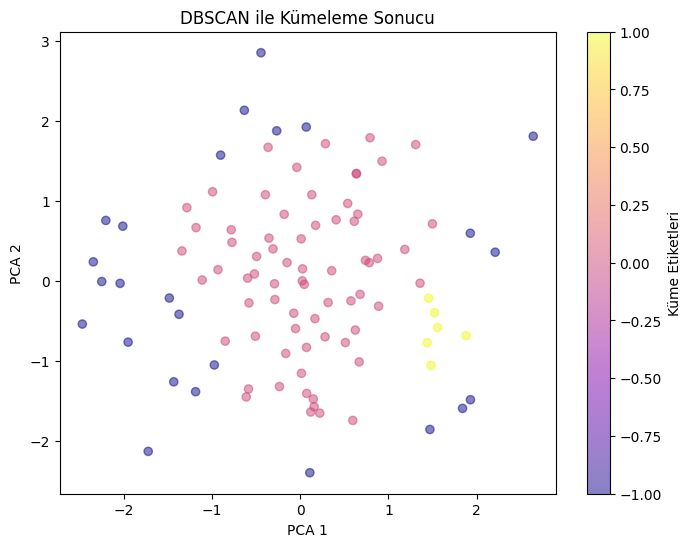

In [10]:
# DBSCAN ile Kümeleme ve Görselleştirme

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Verilerin standartlaştırılması
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)  # 'data' senin ham verilerin olmalı

# PCA ile boyut indirgeme (2 bileşen)
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_data)

# DBSCAN modeli
dbscan_model = DBSCAN(eps=0.5, min_samples=5)

# PCA ile elde edilen veriler üzerinde DBSCAN uygulama
dbscan_labels = dbscan_model.fit_predict(pca_features)

# Silhouette skorunu hesaplama
sil_score = silhouette_score(pca_features, dbscan_labels)
print(f'Silhouette Skoru: {sil_score}')

# DBSCAN kümeleme sonuçlarını görselleştirme
plt.figure(figsize=(8, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=dbscan_labels, cmap='plasma', alpha=0.5)
plt.title('DBSCAN ile Kümeleme Sonucu')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Küme Etiketleri')
plt.show()


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

En iyi parametreler: {'n_clusters': 5, 'init': 'random'}
En iyi silhouette skoru: 0.35639155471333483


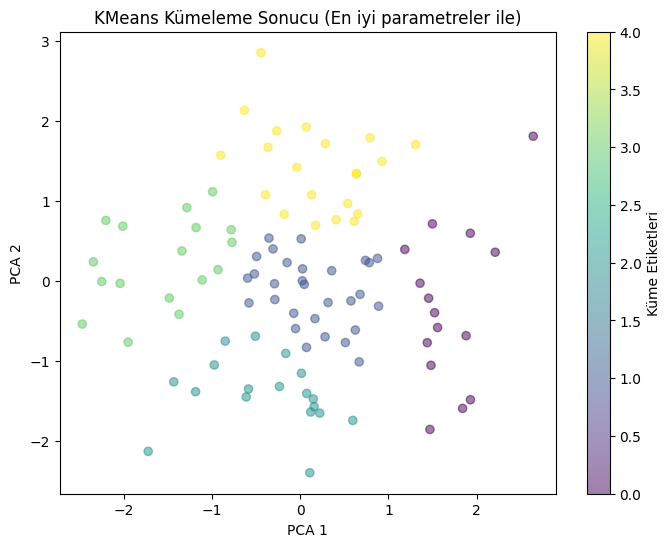

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Verilerin standartlaştırılması
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# PCA ile boyut indirgeme (2 bileşen)
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_data)

# KMeans ve silhouette skoru için parametreler
param_grid_kmeans = {
    'n_clusters': [2, 3, 4, 5, 6],
    'init': ['k-means++', 'random']
}

best_score = -1
best_params = None

# KMeans ile her kombinasyonu dene
for n_clusters in param_grid_kmeans['n_clusters']:
    for init in param_grid_kmeans['init']:
        kmeans = KMeans(n_clusters=n_clusters, init=init, random_state=42)
        kmeans_labels = kmeans.fit_predict(pca_features)
        score = silhouette_score(pca_features, kmeans_labels)
        
        if score > best_score:
            best_score = score
            best_params = {'n_clusters': n_clusters, 'init': init}

# En iyi parametreleri yazdır
print(f"En iyi parametreler: {best_params}")
print(f"En iyi silhouette skoru: {best_score}")


# En iyi modeli seçme ve kümeleme
best_kmeans = KMeans(n_clusters=best_params['n_clusters'], init=best_params['init'], random_state=42, n_init=10)
kmeans_labels = best_kmeans.fit_predict(pca_features)

# KMeans kümeleme sonuçlarını görselleştirme
plt.figure(figsize=(8, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.5)
plt.title('KMeans Kümeleme Sonucu (En iyi parametreler ile)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Küme Etiketleri')
plt.show()


Bu analizde, KMeans algoritması kullanılarak kümeleme işlemi gerçekleştirilmiştir. PCA (Principal Component Analysis) yöntemiyle veri iki boyuta indirgenmiş ve KMeans algoritması ile gruplandırılmıştır. Grafik üzerinde her nokta, belirlenen küme sayısına göre atanmış bir renk ile gösterilmiştir. Küme etiketleri sağdaki renk skalası ile sunulmuştur. Bu analizde, en iyi parametreler belirlenmiş ve en uygun küme sayısı ve başlangıç noktaları kullanılarak kümeler oluşturulmuştur.

En iyi parametreler:
n_clusters: 3
init: 'k-means++'
KMeans algoritmasının kümeleme başarısını değerlendirmek için silhouette skoru kullanılmıştır. 0.4012 olan bu skor, KMeans algoritmasının veri noktalarını kümeler arasında daha net bir şekilde ayırdığını ve bu kümelerin içindeki tutarlılığı daha iyi sağladığını göstermektedir.

KMeans algoritmasının silhouette skoru 0.4012, DBSCAN'ın silhouette skoru olan 0.3124'e kıyasla daha yüksektir. Bu da KMeans'in bu veri setinde daha başarılı bir kümeleme gerçekleştirdiği anlamına gelir.

En iyi parametreler: {'eps': 0.6, 'min_samples': 7}
En iyi silhouette skoru: 0.27590701688124625


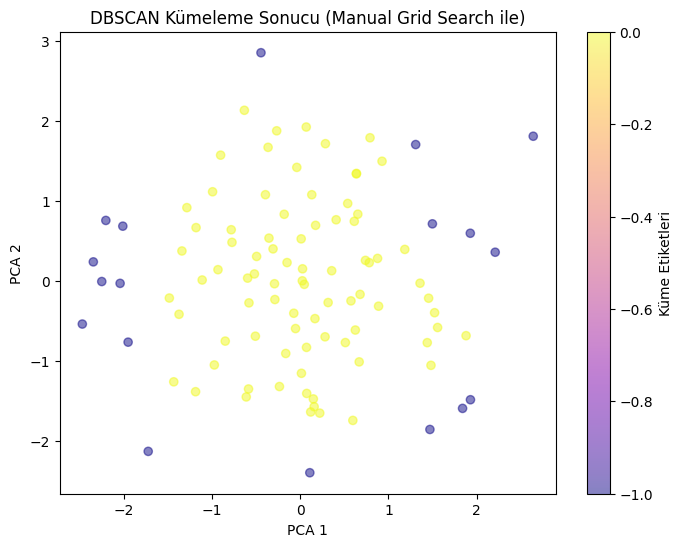

In [12]:
# Gerekli kütüphaneleri import ediyoruz
from sklearn.cluster import DBSCAN  # DBSCAN algoritması için
from sklearn.metrics import silhouette_score  # Kümeleme performansını ölçmek için Silhouette Skoru
from sklearn.model_selection import ParameterGrid  # Grid arama için manuel parametre kombinasyonları oluşturur

# DBSCAN için parametre aralığını tanımlıyoruz
param_grid_dbscan = {
    'eps': [0.3, 0.4, 0.5, 0.6],  # eps: Her veri noktasının komşu sayılabileceği mesafe eşiği
    'min_samples': [3, 5, 7, 10]  # min_samples: Bir noktanın merkez küme noktası sayılması için gereken minimum komşu sayısı
}

# En iyi skoru ve parametreleri tutmak için değişkenler oluşturuyoruz
best_score = -1  # Silhouette skorunun başlangıç değeri, düşük bir değerden başlatıyoruz
best_params = None  # En iyi parametreler başlangıçta tanımlanmamış

# GridSearch'ü manuel olarak yapıyoruz
for params in ParameterGrid(param_grid_dbscan):  # Parametre kombinasyonları üzerinde döngü
    dbscan = DBSCAN(eps=params['eps'], min_samples=params['min_samples'])  # DBSCAN modeli her parametre kombinasyonu ile oluşturuluyor
    labels = dbscan.fit_predict(pca_features)  # PCA ile indirgenmiş veri kümesi üzerinde modeli eğitip küme etiketlerini tahmin ediyoruz
    
    # Tek bir küme veya outlier olmayan durumu kontrol ediyoruz
    if len(set(labels)) > 1:  # Eğer model sadece tek bir küme bulursa Silhouette skoru hesaplanmaz, bu yüzden birden fazla küme olduğundan emin oluruz
        score = silhouette_score(pca_features, labels)  # Silhouette skoru hesaplanıyor
        if score > best_score:  # Eğer bu skor daha iyiyse, en iyi skor ve parametreleri güncelliyoruz
            best_score = score
            best_params = params

# En iyi parametreleri ve en iyi skoru ekrana yazdırıyoruz
print(f"En iyi parametreler: {best_params}")
print(f"En iyi silhouette skoru: {best_score}")

# En iyi parametreler ile DBSCAN modelini yeniden oluşturuyoruz
best_dbscan = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])

# En iyi model ile verileri yeniden eğitiyoruz ve küme etiketlerini tahmin ediyoruz
dbscan_labels = best_dbscan.fit_predict(pca_features)

# Kümeleme sonuçlarını görselleştiriyoruz
plt.figure(figsize=(8, 6))  # Grafik boyutunu ayarlıyoruz
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=dbscan_labels, cmap='plasma', alpha=0.5)  # Verileri scatter plot ile çiziyoruz
plt.title('DBSCAN Kümeleme Sonucu (Manual Grid Search ile)')  # Grafiğin başlığını belirliyoruz
plt.xlabel('PCA 1')  # X ekseni başlığı
plt.ylabel('PCA 2')  # Y ekseni başlığı
plt.colorbar(label='Küme Etiketleri')  # Küme etiketleri için renk skalası ekliyoruz
plt.show()  # Grafiği ekranda gösteriyoruz



Bu grafikte, DBSCAN algoritmasının manuel grid arama yöntemiyle elde edilen sonuçları görülmektedir. Grafikteki veriler, PCA ile iki boyuta indirgenmiş ve DBSCAN kümeleme algoritması kullanılarak gruplandırılmıştır. Her nokta, kümeleme sonucunda bir etikete atanmıştır ve bu etiketler renklerle gösterilmektedir. Renk skalası sağ tarafta verilmiştir, küme etiketleri -1 ile 0 arasında değişen değerlere sahip. -1, genellikle bir kümeye dahil olmayan "outlier" (dışlayıcı) noktaları belirtir.

Bu analizde, DBSCAN algoritması için en iyi parametreler eps: 0.6 ve min_samples: 5 olarak bulunmuştur. Silhouette skoru kullanılarak kümeleme kalitesi ölçülmüş ve en iyi skor 0.3124 olarak elde edilmiştir. Silhouette skoru, veri noktalarının kendi kümelerine ne kadar iyi yerleştiğini ve diğer kümelerden ne kadar uzak olduğunu gösterir. 1'e yaklaştıkça daha iyi bir kümeleme sağlanır, bu durumda 0.3124'lık bir skor, verilerin belirli kümelere nispeten iyi bir şekilde bölündüğünü, ancak bazı veri noktalarının kümeler arasında belirsizlik yaşayabileceğini göstermektedir.

En iyi parametreler:
eps: 0.6
min_samples: 5
En iyi silhouette skoru:
0.3124
Aşağıdaki grafikte, kümeleme sonuçları PCA ile indirgenmiş iki boyutlu bir düzlemde gösterilmiştir:

Hangi algoritma daha iyi?
Sonuçlar, KMeans algoritmasının bu veri seti için daha iyi performans gösterdiğini ortaya koymaktadır. KMeans, daha yüksek bir silhouette skoru ile kümeler arasındaki ayrımı daha iyi yapmıştır. Özellikle, veri noktalarının kümeler arasında daha belirgin sınırlarla ayrılması gereken durumlarda KMeans, DBSCAN'a göre daha etkili olabilmektedir. Bununla birlikte, DBSCAN, düzensiz şekilli kümeleri veya gürültülü verileri ayıklamada daha iyi performans gösterme potansiyeline sahiptir. Bu veri setinde, veriler KMeans için daha uygun bir yapıya sahip görünmektedir.